## Lendo as Features já tratadas

In [1]:
import pandas as pd

In [2]:
X = pd.read_csv('Features_clean.csv')

In [3]:
X.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,0.827377,-0.592494,-0.502445,-0.737695,0.737695
1,-1.566107,0.638776,0.786845,1.355574,-1.355574
2,0.827377,-0.284677,-0.488854,1.355574,-1.355574
3,-1.566107,0.407912,0.420730,1.355574,-1.355574
4,0.827377,0.407912,-0.486337,-0.737695,0.737695


## Tratando o y

In [6]:
data = pd.read_csv('train.csv')

In [7]:
y = data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Separando em teste/treino

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

seed = 1

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

## Importando KNN e aplicando RandomizedSearchCV para hiperparametrização

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [29]:
# Definindo o modelo

model = KNeighborsClassifier()

In [30]:
# Definindo parâmetros a serem ajustados
adjust_neighbors = np.arange(1,500,2)
adjust_weight = ['uniform', 'distance']

random_grid = {'n_neighbors': adjust_neighbors, 'weights': adjust_weight}

KNN_model_adjust = RandomizedSearchCV(estimator=model, param_distributions=random_grid, verbose=1, n_jobs=-1, n_iter=100)

hyperparam_model = KNN_model_adjust.fit(X_train, y_train)

pd.DataFrame(hyperparam_model.cv_results_).sort_values('rank_test_score', ascending=True).head(10)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.8s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
74,0.005876,0.000822,0.031099,0.005232,distance,395,"{'weights': 'distance', 'n_neighbors': 395}",0.790210,0.811189,0.838028,0.845070,0.788732,0.814646,0.023465,1
84,0.007674,0.002174,0.010230,0.005062,distance,17,"{'weights': 'distance', 'n_neighbors': 17}",0.776224,0.804196,0.845070,0.830986,0.809859,0.813267,0.023628,2
82,0.006870,0.001685,0.009690,0.000821,distance,35,"{'weights': 'distance', 'n_neighbors': 35}",0.776224,0.811189,0.838028,0.823944,0.816901,0.813257,0.020576,3
73,0.006360,0.001209,0.029521,0.004499,distance,409,"{'weights': 'distance', 'n_neighbors': 409}",0.804196,0.804196,0.838028,0.830986,0.788732,0.813228,0.018404,4
27,0.003996,0.001347,0.028849,0.005429,distance,401,"{'weights': 'distance', 'n_neighbors': 401}",0.790210,0.804196,0.838028,0.830986,0.788732,0.810430,0.020507,5
79,0.006582,0.002425,0.009104,0.002002,distance,29,"{'weights': 'distance', 'n_neighbors': 29}",0.776224,0.797203,0.830986,0.823944,0.816901,0.809052,0.019913,6
94,0.006783,0.002190,0.021977,0.001693,distance,353,"{'weights': 'distance', 'n_neighbors': 353}",0.783217,0.797203,0.838028,0.830986,0.795775,0.809042,0.021470,7
89,0.006742,0.001701,0.020215,0.003272,distance,325,"{'weights': 'distance', 'n_neighbors': 325}",0.783217,0.797203,0.838028,0.830986,0.795775,0.809042,0.021470,7
63,0.005073,0.001754,0.024019,0.002572,distance,349,"{'weights': 'distance', 'n_neighbors': 349}",0.783217,0.797203,0.838028,0.830986,0.795775,0.809042,0.021470,7
21,0.005972,0.001477,0.013081,0.007077,distance,15,"{'weights': 'distance', 'n_neighbors': 15}",0.783217,0.804196,0.830986,0.809859,0.816901,0.809032,0.015712,10


In [31]:
hiperparametros = hyperparam_model.best_params_
hiperparametros

{'weights': 'distance', 'n_neighbors': 395}

In [32]:
modelo_otimizado = KNeighborsClassifier(n_neighbors = 17, weights = 'distance')

In [33]:
modelo_otimizado.fit(X_train, y_train)
predictions = modelo_otimizado.predict(X_test)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
y_test = np.asarray(y_test)

## Avaliando o modelo

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       106
           1       0.81      0.66      0.73        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

Confusion matrix, without normalization
[[95 11]
 [25 48]]


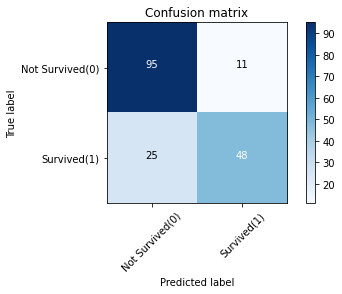

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Survived(0)','Survived(1)'], title='Confusion matrix')

In [37]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='weighted')

0.7944466666966297

## Predizendo e exportando os dados

In [39]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
features = ['Pclass','Sex', 'Age', 'Fare']

In [41]:
X_pred = pd.get_dummies(test_data[features])

In [42]:
X_pred.tail()

,Pclass,Age,Fare,Sex_female,Sex_male
413,3,NaN,8.0500,0,1
414,1,39.0,108.9000,1,0
415,3,38.5,7.2500,0,1
416,3,NaN,8.0500,0,1
417,3,NaN,22.3583,0,1


In [43]:
media_idade = X_pred.Age.mean()
X_pred = X_pred.fillna(value=media_idade.round(2))

In [44]:
X_pred.tail()

,Pclass,Age,Fare,Sex_female,Sex_male
413,3,30.27,8.0500,0,1
414,1,39.00,108.9000,1,0
415,3,38.50,7.2500,0,1
416,3,30.27,8.0500,0,1
417,3,30.27,22.3583,0,1


In [45]:
from sklearn.preprocessing import StandardScaler
pred_scaler = StandardScaler()
X_pred = pd.DataFrame(pred_scaler.fit_transform(X_pred), columns = X_pred.columns)

In [46]:
X_pred.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,0.873482,0.335035,-0.498172,-0.755929,0.755929
1,0.873482,1.325572,-0.513039,1.322876,-1.322876
2,-0.315819,2.514217,-0.464854,-0.755929,0.755929
3,0.873482,-0.259288,-0.483231,-0.755929,0.755929
4,0.873482,-0.655503,-0.418237,1.322876,-1.322876


In [47]:
final_pred = modelo_otimizado.predict(X_pred)

In [48]:
output = pd.DataFrame({'PassengerID': test_data.PassengerId, 'Survived': final_pred})
output.to_csv('KNNSubmission_RandomizedSearchCV_otimizado.csv', index=False)